# Name : Dohyun Kwon
# Student ID : 2018120191
# github repository: https://github.com/hilariouss/assignment04.git

1. Load library and initialize parameters regarding data file (MNIST) and size related parameters

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from scipy.spatial import distance
file_data = "mnist_test.csv"
handle_file = open(file_data, "r")
data = handle_file.readlines()
handle_file.close()

k = 10
size_row = 28  # height of the image
size_col = 28  # width of the image

num_image = len(data) # 10,000

2. define 'normalize' function

In [2]:
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return (data_normalized)

3. define 'computeDistance' function

In [3]:
def computeDistance(x, y):
    # dst = math.sqrt(sum([(x-y)**2 for x,y in zip(x,y)]))
    # dst = np.linalg.norm(x-y)
    dst = distance.euclidean(x, y)
    return dst

4. define 'initialiseLabel' function

In [4]:
def initialiseLabel():
    """""
    Initialize label value
    """""
    list_label = np.random.randint(0, k, size=num_image)
    return list_label

5. define 'computeCentroid' function

In [5]:
def computeCentroid(list_image_pixel, list_label_iter, list_centroid_pixel):
    """""
    return a new centroid set
    """""
    # 1. centroid 0번부터 자신의 라벨에 해당하는 점들 평균내서 거기로 이동
    # centroid
    centroid_sum_row = np.zeros(size_row*size_col, dtype=float)
    count = 0
    for i in range(k):
        for j in range(num_image):
            if list_label_iter[j] == i: # list_centroid_pixel의 해당 위치에 속하는 list_label_iter라면
                centroid_sum_row += list_image_pixel[j, :]
                count += 1
        list_centroid_pixel[i, :] = centroid_sum_row / count
        count = 0
        centroid_sum_row = np.zeros(size_row*size_col, dtype=float)
    return list_centroid_pixel

6. define 'assignLabel' function

In [6]:
def assignLabel(list_image_pixel, list_label_iter, list_centroid_pixel):
    """""
    Allocate new label to list_label_iter based on the distance between images and centroid
    """""
    distance = np.zeros(k, dtype=float)
    for i in range(num_image):
        candidate = []
        for j in range(k):
            distance[j] = computeDistance(list_image_pixel[i], list_centroid_pixel[j])
        min_idx = np.argmin(distance) # distance 값중에 가장 작은 인덱스 추출
        for j in range(k):
            if distance[min_idx] == distance[j]:
                candidate.append(j) # 인덱스 저장
        candidate = np.array(candidate)
        choice = random.choice(candidate)
        list_label_iter[i] = choice
        distance = np.zeros(k, dtype=float)

    return list_label_iter

7. define 'computeAccuracy' function

In [7]:
def computeAccuracy(list_label_real, list_label_iter, list_image_pixel, list_centroid_pixel):
    # 1. 원본데이터 라벨별로 평균내기
    Avg_list_image_pixel = np.zeros((k, size_row * size_col), dtype=float)
    count = 0
    for j in range(k):
        for i in range(num_image):
            if list_label_real[i] == j:
                Avg_list_image_pixel[j, :] += list_image_pixel[i, :]
                count += 1
        Avg_list_image_pixel[j, :] /= count
        count = 0
    # Avg_list_image_pixel[0] : 0을 진짜 label로 갖는 이미지들의 평균 값

    # 2. 평균낸 원본 데이터와 centroid의 거리 비교해서 각 인덱스에 대한 centroid가
    # 어떤 진짜 라벨과 가장 가까운지 파악
    list_transform_label = np.zeros(k, dtype=int)  # 변환 centroid 라벨 저장 배열
    list_distance = np.zeros(k, dtype=float)  # 거리 계산용

    for i in range(k):
        for j in range(k):
            list_distance[j] = computeDistance(Avg_list_image_pixel[j], list_centroid_pixel[i])

        list_transform_label[i] = np.argmin(list_distance)
        list_distance = np.zeros(k, dtype=float)
    # list_transform_label : centroid의 변환된 라벨 값

    # 3. 이후 그 인덱스에 대한 라벨을 list_label_iter과 비교
    list_label_transformed = list_label_iter

    for i in range(num_image):
        list_label_transformed[i] = list_transform_label[list_label_iter[i]]

    # list_label_transformed 와 list_label_real의 일치도 비교
    count = 0
    for i in range(num_image):
        if list_label_transformed[i] == list_label_real[i]:
            count += 1
    Accuracy = count / num_image
    return Accuracy

8. define 'computeEnergy' function

In [8]:
def computeEnergy(list_image_pixel, list_centroid_pixel, list_label_iter):
    EnergySum = 0
    for i in range(num_image):
        EnergySum += computeDistance(list_image_pixel[i, :], list_centroid_pixel[list_label_iter[i], :])
    #EnergyAvg = EnergySum / num_image
    return EnergySum

9. define 'plot_centroid_images' function

In [9]:
def plot_centroid_images(images):
    f3 = plt.figure(3)
    for i in range(k):
        plt.subplot(2, k/2, i + 1)
        plt.title(i)
        plt.imshow(images[i, :].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

        frame = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
    plt.show()

10. define 'plot_centroid_history' function

In [10]:
def plot_centroid_history(history):
    f4 = plt.figure(4)
    plt.plot(history)
    plt.show()

11. Initialize the iteration settings and centroid settings

In [11]:
list_image_pixel = np.empty((num_image, size_row * size_col), dtype=float)  # For image data
list_label_real = np.empty(num_image, dtype=int)  # For REAL label

list_label_iter = initialiseLabel()         # For iter label
list_label_iter_prev = initialiseLabel()    # For iter label (prev)

# <Centroid>
list_centroid_pixel = np.empty((k, size_row * size_col), dtype=float) # For centroid pixel

# 1. data 읽어서 list_image_pixel, list_label_real 초기화 ok
i = 0
for line in data:
    line_data = line.split(',')
    list_label_real[i] = line_data[0] # REAL image label

    im_vector = np.asfarray(line_data[1:]) # image digits
    im_vector = normalize(im_vector)       # image normalize
    list_image_pixel[i, :] = im_vector
    i += 1

# 2. Centroid 초기화 ok
index = np.random.randint(0, num_image, size=k) # 1 x k
for i in range(k):
    list_centroid_pixel[i, :] = list_image_pixel[index[i], :]

Initial_centroid = list_image_pixel

loop_count = 0
End_Condition = False
before_accuracy = 0
before_energy = 0
accuracy_histogram = []
energy_histogram = []

12. Iterate until the accuracy and energy do not change anymore.
(Note that the intermediate results including label value of each image, transition of centroid, accuracy, and energy were set not to show for simplicity. However, the final results with loop count, accuracy, and energy are given as follows.) 

In [12]:
# 3. iteration
while True:
    # Store the current label
    #list_label_iter_prev = list_label_iter

    # 0. print the loop count
    #print("*" * 70)                        # log ignore
    #print('Loop count ' + str(loop_count)) # log ignore
    #print("*" * 70)                        # log ignore
    list_label_iter = assignLabel(list_image_pixel, list_label_iter, list_centroid_pixel)
    #print(list_label_iter)                 # log ignore
    #print(list_label_iter_prev)            # log ignore
    # 2. 새로운 센트로이드 이동 !!!
    #print("Move the centroids...")         # log ignore
    list_centroid_pixel = computeCentroid(list_image_pixel, list_label_iter, list_centroid_pixel)

    # 1. 점들의 라벨값 할당
    #print("New label allocation completed")# log ignore
    list_label_iter = assignLabel(list_image_pixel, list_label_iter, list_centroid_pixel)

    # 3. 정확도 계산 !!!
    #print("Calculating the accuracy...")   # log ignore
    accuracy = computeAccuracy(list_label_real, list_label_iter, list_image_pixel, list_centroid_pixel)
    #print('accuracy : ')                   # log ignore
    #print(accuracy)                        # log ignore

    # 4. 에너지 계산
    #print("Evaluate energy...")            # log ignore
    energy = computeEnergy(list_image_pixel, list_centroid_pixel, list_label_iter)
    #print('Energy : ')                     # log ignore
    #print(energy)                          # log ignore

    accuracy_histogram.append(accuracy)
    energy_histogram.append(energy)

    if(before_accuracy == accuracy) and (before_energy == energy):
        print("Termination !")

        break
    before_energy = energy
    before_accuracy = accuracy
    loop_count += 1

print("*"*40)
print("k-means clustering for MNIST data set is completed with " + str(loop_count) + " steps !!")
print("Final accuracy: " + str(accuracy))
print("Final energy: " + str(energy))
print("*"*40)

Termination !
****************************************
k-means clustering for MNIST data set is completed with 51 steps !!
Final accuracy: 0.6051
Final energy: 80415.29547369134
****************************************


13. Plot the first requirement (Initial centroid plot)

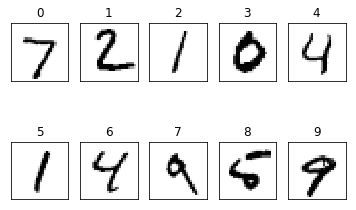

In [13]:
plot_centroid_images(Initial_centroid)

14. Plot the second requirement (Final centroid plot)

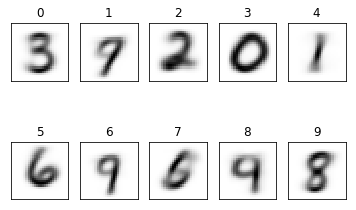

In [14]:
plot_centroid_images(list_centroid_pixel)

15. Plot the third requirement (Accuracy histogram)

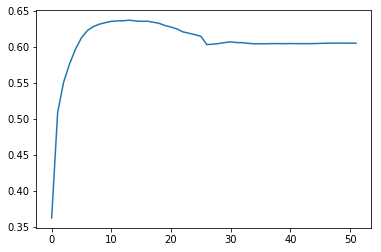

In [15]:
plot_centroid_history(accuracy_histogram)

16. Plot the fourth requirement (Energy histogram)

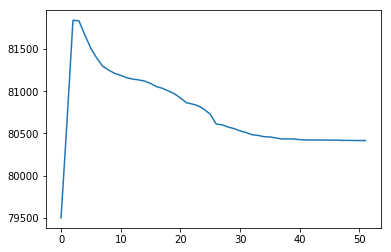

In [16]:
plot_centroid_history(energy_histogram)